In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import glob

In [9]:
df = pd.DataFrame()
for f in glob.glob("experiments_results\\*.xlsx"):
    df = pd.concat([df, pd.read_excel(f)])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1552 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Unnamed: 0                                                 1552 non-null   int64  
 1   Загруженность ресурсов (%)                                 1552 non-null   float64
 2   Общий пробег                                               1552 non-null   float64
 3   Соблюдение временных окон (%)                              1552 non-null   float64
 4   Равномерность распределения нагрузки (StdDev of Earnings)  1552 non-null   float64
 5   Среднее время выполнения заказа                            1552 non-null   float64
 6   experiment_time                                            1552 non-null   float64
 7   tick_size                                                  1552 non-null   int64  
 8   time_stop     

In [7]:
df = pd.read_excel("experiments_results\\23-06-2025_14-59-53_196.xlsx")
df[:3]

,Unnamed: 0,Загруженность ресурсов (%),Общий пробег,Соблюдение временных окон (%),Равномерность распределения нагрузки (StdDev of Earnings),Среднее время выполнения заказа,Количество сообщений,Количество выполненных заказов,Среднее время выполнения срочных заказов,Среднее время выполнения несрочных заказов,...,tick_size,time_stop,num_orders,urgent_percentage,num_couriers,map_size,max_appearance_time,avg_courier_speed,velocity_range,payload_range
0,0,4.505451,485.501672,0.000000,387.670874,71.497299,210,5,0.0,71.497299,...,1,240,5,0,20,"(100, 100)",220,4,"(2.0, 4.0)","(10.0, 20.0)"
1,1,6.812400,1015.415087,40.000000,555.136461,80.337108,420,10,0.0,80.337108,...,1,240,10,0,20,"(100, 100)",220,4,"(2.0, 4.0)","(10.0, 20.0)"
2,2,10.545581,1288.566316,26.666667,902.025353,100.546667,630,15,0.0,100.546667,...,1,240,15,0,20,"(100, 100)",220,4,"(2.0, 4.0)","(10.0, 20.0)"


In [10]:
df.columns

Index(['Unnamed: 0', 'Загруженность ресурсов (%)', 'Общий пробег',
       'Соблюдение временных окон (%)',
       'Равномерность распределения нагрузки (StdDev of Earnings)',
       'Среднее время выполнения заказа', 'experiment_time', 'tick_size',
       'time_stop', 'num_orders', 'urgent_percentage', 'num_couriers',
       'map_size', 'max_appearance_time', 'avg_courier_speed',
       'velocity_range', 'payload_range', 'Количество сообщений',
       'Количество выполненных заказов',
       'Среднее время выполнения срочных заказов',
       'Среднее время выполнения несрочных заказов'],
      dtype='object')

In [11]:
'Загруженность ресурсов (%)', 
'Общий пробег',
'Соблюдение временных окон (%)',
'Равномерность распределения нагрузки (StdDev of Earnings)',
'Среднее время выполнения заказа', 
'experiment_time', 
'tick_size',
'time_stop', 
'num_orders', 
'urgent_percentage', 
'num_couriers',
'map_size', 
'max_appearance_time', 
'avg_courier_speed',
'velocity_range', 
'payload_range'

'payload_range'

In [12]:
col_metrics = ['Загруженность ресурсов (%)', 'Общий пробег',
       'Соблюдение временных окон (%)',
       'Равномерность распределения нагрузки (StdDev of Earnings)',
       'Среднее время выполнения заказа', 'Количество сообщений',
       'Количество выполненных заказов',
       'Среднее время выполнения срочных заказов',
       'Среднее время выполнения несрочных заказов']

col_parametrs = ['tick_size',
    'time_stop', 
    'num_orders', 
    'urgent_percentage', 
    'num_couriers',
    'map_size', 
    'max_appearance_time', 
    'avg_courier_speed',
    'velocity_range', 
    'payload_range']


In [13]:
new_metric_name = "Отношение загруженности к количеству заказов"
df[new_metric_name] = df['Загруженность ресурсов (%)']/df['num_orders']
if not new_metric_name in col_metrics:
    col_metrics.append(new_metric_name)

new_metric_name = "Средний пробег одного курьера"
df[new_metric_name] = df['Общий пробег']/df['num_orders']
if not new_metric_name in col_metrics:
    col_metrics.append(new_metric_name)

In [14]:
normal_values = {}
for col in col_parametrs:
    l_unique = list(df[col].unique())
    print(col, l_unique[len(l_unique)//2], l_unique, sep=",\t")
    normal_values[col] = l_unique[len(l_unique)//2]

tick_size,	1,	[1]
time_stop,	240,	[240]
num_orders,	80,	[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
urgent_percentage,	10,	[0, 5, 10, 15, 20]
num_couriers,	45,	[20, 25, 30, 35, 40, 45, 50, 5, 10, 15]
map_size,	(100, 100),	['(100, 100)']
max_appearance_time,	50,	[220, 50]
avg_courier_speed,	5,	[4, 5, 3]
velocity_range,	(8.0, 15.0),	['(2.0, 4.0)', '(8.0, 15.0)']
payload_range,	(10.0, 20.0),	['(10.0, 20.0)']


In [15]:
# вывод графика
def show_3axis(show_axes):
    fig, ax = plt.subplots(1, 1,figsize=(9, 4))

    x = df[show_axes[0]].unique()
    for z in df[show_axes[2]].unique():
        masks = []
        for norm_col, norm_val in normal_values.items():
            if norm_col in show_axes:
                continue
            masks.append(df[norm_col] == norm_val)
        masks.append(df[show_axes[2]] == z)
        mask = pd.concat(masks, axis=1).all(axis=1)
        ax.plot(x, df[mask][show_axes[1]], label=f"{show_axes[2]}: {z}")

    ax.set_xlabel(show_axes[0])
    ax.set_ylabel(show_axes[1])
    ax.set_title(show_axes[1])
    plt.legend()


ValueError: x and y must have same first dimension, but have shapes (30,) and (18,)

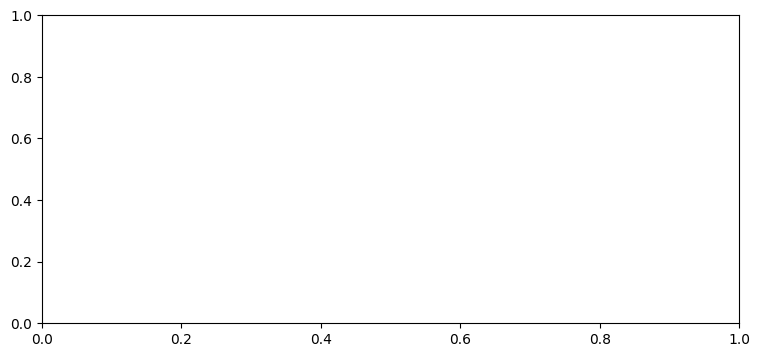

In [16]:
for col_metr in col_metrics:
    show_3axis(["num_orders", col_metr, "num_couriers"])